In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Analisis Bivariado

Antes de entrar directamente al análisis bivariado, veremos el tema del Z-score.

## Z-Score

El z-score es una medida estadisitica que cuantifica la distancia. Las puntuaciones z son desviaciones estándar. 

La formula para hallar el z-score es la siguiente:

* $\large z = \frac {datapoint - mean}{standard deviation} $

Tenemos el siguiente conjunto de datos como ejemplo:

In [2]:
array = np.array([85, 95, 70, 80, 90])
array

array([85, 95, 70, 80, 90])

1. Calcularemos la media y desviacion estandar

In [3]:
mean = array.mean()
sdt = array.std(ddof=False)
print(f'La media es: {mean}')
print(f'La desviacion estandar es: {sdt}')

La media es: 84.0
La desviacion estandar es: 8.602325267042627


2. Calculamos el z-score para cada punto de datos.

In [4]:
z_score = (array-mean)/sdt
z_score

array([ 0.11624764,  1.27872403, -1.62746694, -0.46499055,  0.69748583])

In [5]:
from scipy import stats
stats.zscore(array)

array([ 0.11624764,  1.27872403, -1.62746694, -0.46499055,  0.69748583])

#### ¿Para que nos sirve el  Z-score?
* Nos ayuda a responder que tan lejos esta cada punto respecto de la media

#### ¿ Cuantas desviaciones estandar esta un punto de datos respecto de la media ?
* La desviacion estandar se convierte en una regla de orden, una unidad de medida

Debido a que al desviacion estandar es una medida de distancia respecto a la media. Asignaremos el valor de 0 (cero) a la medida como punto de partida.

#### Conclusion: 

Del ejemplo anterior podemos afirmar que el valor 80 esta alejado -0.46499055 desviaciones estandar respecto de la media 85.

## Coeficiente de variacion

El coeficiente de variacion nos permite comparar la dispersion de dos distribuciones distintas, siempre que sus medias sean positivas.

La formula es la siguiente:

$\large CV = \frac{standard deviation}{mean}$

# Covarianza 

La covarianza es una medida estadistica que nos ayuda a analizar la relacion lineal entre dos variables, ademas solo indica direccion pero no fuerza, es decir nos permite responder a la pregunta: ¿Como se comportan estas dos variables en pares?

* Un valor positivo indica una relacion lineal positiva o incremental
* Un valor negativo indica una relacion lineal negativa o decremental

La fomrula de la covarianza muestral es:

$\large Cov(x,y) = \frac{\sum{(x - \bar{x})(y - \bar{y}) }}{(n-1)} $

Donde: 

**x:** representa cada punto de la primera variable

**y:** representa cada punto de la segunda variable


In [6]:
cantidad = np.array([10, 20, 30, 40, 50])
precio = np.array([60, 40, 20, 10, 5])
print('Cantidad:', cantidad)
print('Precio:', precio)

Cantidad: [10 20 30 40 50]
Precio: [60 40 20 10  5]


In [7]:
print('La media de la cantidad: ', cantidad.mean())
print('La media del precio: ', precio.mean())

La media de la cantidad:  30.0
La media del precio:  27.0


In [8]:
print('La varianza de la cantidad: ', cantidad.var(ddof=1))
print('La varianza del precio: ', precio.var(ddof=1))

La varianza de la cantidad:  250.0
La varianza del precio:  520.0


In [9]:
np.cov(cantidad,precio)

array([[ 250., -350.],
       [-350.,  520.]])

La covarianza entre las variables de cantidad es: -350, por lo que podemos afirmar que tienen una **relacion lineal negativa**

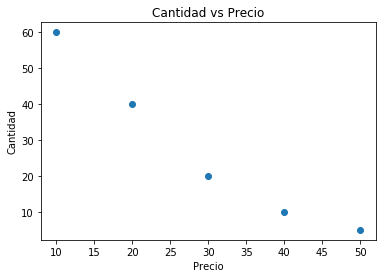

En el siguiente grafico observamos la relacion linear negativa entre las dos variable


In [10]:
plt.scatter(cantidad,precio)
plt.title("Cantidad vs Precio")
plt.xlabel('Precio')
plt.ylabel("Cantidad")
plt.show()
print('En el siguiente grafico observamos la relacion linear negativa entre las dos variable')

# Covarianza vs Correlacion

La covarianza provee direccion (positiva, negativa, cercana a cero) en una relacion lineal de dos variables.
    - La CORRELACION provee la direccion y la fuerza

El resultado de la covarianza no tiene limite superior ni inferior, dependen de la escala de las variables.
    - La CORRELACION se encuentra entre -1 y 1, ademas su escala es independiente de la escala de las variables
    
La covarianza no esta estandarizada
    - La CORRELACION esta estandarizada (z-score)

# Correlacion

1. La correlacion solo es aplicable a RELACIONES LINEALES.
2. La correlacion no significa CAUSALIDAD.
3. Una correlacion FUERTE no es realmente significante, esto depende muchas veces de la muestra tomada.

La formula de la correlacion es la siguiente:
$\large r = \frac {Covariance(x,y)}{Std(x) * Std(y)} $

Donde $r$ es el coeficiente de Pearson.

Existe una regla de oro para comprobar si existe relacion entre las variables y es la siguiente:

$\large Si: |{r}| >= \frac {2}{\sqrt n}$, entonces existe correlacion. 

Donde $n$ es el numero de elementos.

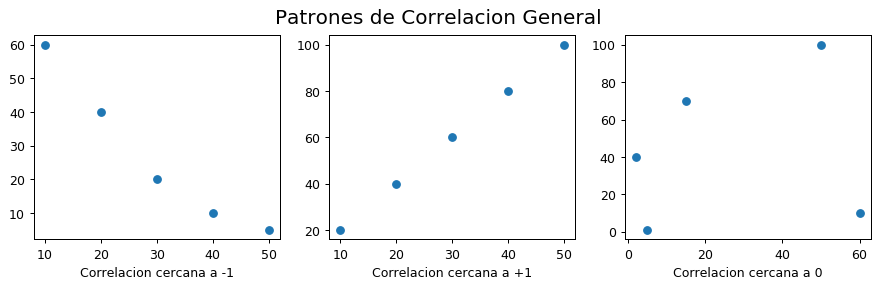

In [11]:
cantidad = np.array([10, 20, 30, 40, 50])
precio = np.array([60, 40, 20, 10, 5])

cantidad2 = np.array([10, 20, 30, 40, 50])
precio2 = np.array([20, 40, 60, 80, 100])

cantidad3 = np.array([15, 2, 5, 60, 50])
precio3 = np.array([70, 40, 1, 10, 100])

plt.figure(figsize=(12,3), dpi=90)
plt.subplot(131)
plt.scatter(cantidad,precio)
plt.xlabel("Correlacion cercana a -1")

plt.subplot(132)
plt.scatter(cantidad2,precio2)
plt.xlabel("Correlacion cercana a +1")

plt.subplot(133)
plt.scatter(cantidad3,precio3)
plt.xlabel("Correlacion cercana a 0")

plt.suptitle('Patrones de Correlacion General', fontsize=16)

plt.show()

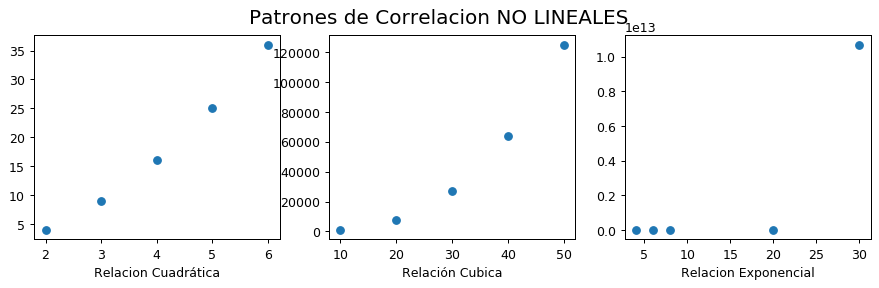

In [12]:
cantidad = np.array([2, 3, 4, 5, 6])
precio = np.array([4, 9, 16, 25, 36])

cantidad2 = np.array([10, 20, 30, 40, 50])
precio2 = np.power(cantidad2,3)

cantidad3 = np.array([4, 6, 8, 20, 30])
precio3 = np.exp(cantidad3)

plt.figure(figsize=(12,3), dpi=90)
plt.subplot(131)
plt.scatter(cantidad,precio)
plt.xlabel("Relacion Cuadrática")

plt.subplot(132)
plt.scatter(cantidad2,precio2)
plt.xlabel("Relación Cubica")

plt.subplot(133)
plt.scatter(cantidad3,precio3)
plt.xlabel("Relacion Exponencial")

plt.suptitle('Patrones de Correlacion NO LINEALES', fontsize=16)

plt.show()

## Ejemplo 

In [13]:
df = pd.read_csv(".\datasets\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Eliminamos la primera columna la cual es irrelevante para el analisis de correlacion

In [14]:
del df['Unnamed: 0']
df.head(1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1


Calculamos la correlacion entre nuestras variables cuantitativas. 

In [15]:
corr_matrix = df.corr(method='pearson')
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(3)

,TV,Radio,Newspaper,Sales
TV,1,0.0548,0.0566,0.782
Radio,0.0548,1,0.354,0.576
Newspaper,0.0566,0.354,1,0.228
Sales,0.782,0.576,0.228,1


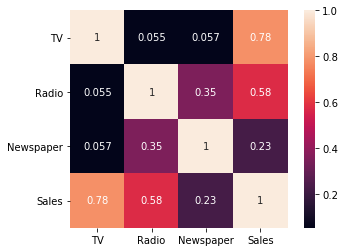

In [17]:
# Usando seaborn
sb.heatmap(corr_matrix, square=True, annot=True)
plt.show()